# Week 4 _Data Processing Practice with the Wealther AUS Data
## INFO - 511 - Fundamental of Data Science
### To day we are going to learn data preprocessing with the python such as data transforming , 
A real-world weather dataset (e.g., weatherAUS.csv from Kaggle).

A Jupyter Notebook workflow:

Load dataset

Data cleaning (missing values, datatype conversions)

Mean/Median/Mode imputation with visualizations

Feature engineering (e.g., date parts, encoding)

Simple model with F1 Score for evaluation

In [2]:
# Load the necessary packages or libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
# load the Weather AUS csv file
df = pd.read_csv("weatherAUS.csv")
print(df.shape)
df.head()


(145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Check the missing values
df.info(verbose=True) 

df.isnull().sum().sort_values(ascending=False).head(10)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
dtype: int64

In [5]:
# Handing Missig Values with the Impuatation

# Mean Imputation for numeric
df["MinTemp"] = df["MinTemp"].fillna(df["MinTemp"].mean())

# Median Imputation for  skewd data
df["Rainfall"] = df["Rainfall"].fillna(df['Rainfall'].median()) 

# Mode Imputation for Categorical
df["WindGustDir"]= df["WindGustDir"].fillna(df["WindGustDir"].mode())


In [6]:
# Conver Date and extract Features

import pandas as pd

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [7]:
# Encode Categorical Varibles

df['RainTomorrow'] = df['RainTomorrow'].map({'Yes':1, 'No':0})
df['WindGustDir'] = df['WindGustDir'].astype('category').cat.codes


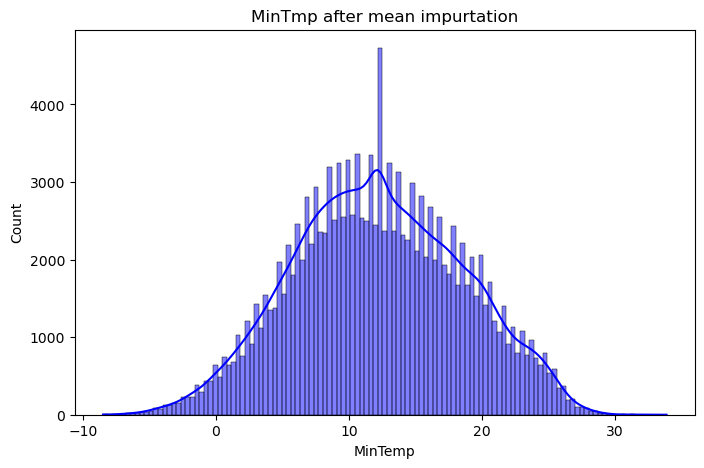

In [8]:
# Visulization for Before After Imputation (Mean)

import seaborn as sns #Necessary library
import matplotlib.pyplot as plt #Necessary library

plt.figure (figsize=(8,5))
sns.histplot( df['MinTemp'], kde= True, color="blue")
plt.title('MinTmp after mean impurtation')
plt.show()



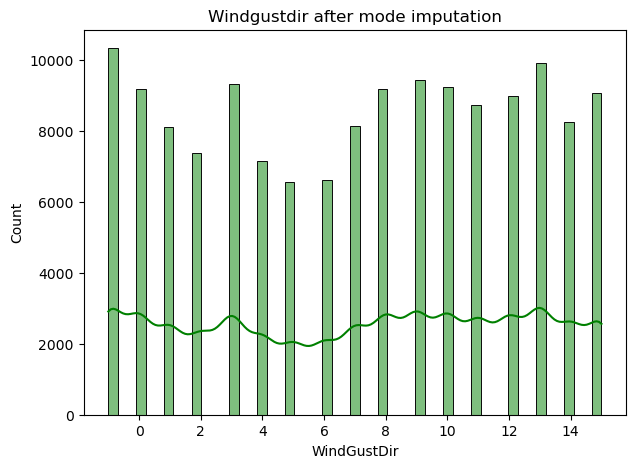

In [11]:
# visulization Before after Mode Imputation
plt.figure(figsize=(7,5))
sns.histplot(df["WindGustDir"], kde= True, color="green")
plt.title("Windgustdir after mode imputation")
plt.show()

In [12]:
# Drop rows with remaining missing values
df = df.dropna()

# Features & target
X = df[['MinTemp', 'Rainfall', 'WindGustDir', 'Month']]
y = df['RainTomorrow']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# F1 Score
score = f1_score(y_test, y_pred)
print("F1 Score:", score)


F1 Score: 0.36352693349383086
